In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.signal import stft, istft
from scipy.signal import get_window

In [2]:
def find_maxima(data, nmax=10, threshold=0):
    if data is None:
        return None
    peak = []
    for index in range(1,len(data)-1):
        if data[index]>data[index-1] and data[index]>data[index+1]:
            omega_list = np.arange(index-1,index+2)
            Vlist = data[index-1:index+2]
            T = np.array([omega_list**2, omega_list, np.ones(omega_list.shape)]).T
            coeff = np.linalg.inv(T)@Vlist
            max_position = -coeff[1]/(2*coeff[0])
            max_value = np.array([max_position**2, max_position, 1]) @ coeff
            if max_value >threshold:
                peak.append([max_position, max_value])
    return np.array(sorted(peak, key=lambda x: x[1])[::-1])[:nmax]

In [3]:
sample_rate = 44100 #Hz
dt = 1/sample_rate
t_int=0.1 #sec
t_step = 0.01 # sec
N_T = int(sample_rate*t_int)

O = 201.8 #Hz
A=1
t0=0 #sec
t1=1 #sec
trange = np.arange(t0,t1,dt)
fv = np.cos(2*np.pi*O*trange)

nperseg = int(t_int*sample_rate)
noverlap = nperseg - int(t_step*sample_rate)
fs=1
f, t, Zxx = stft(fv, fs=1.0, window='hann', nperseg=nperseg, noverlap=noverlap, boundary=None)

In [4]:
(t[1]-t[0])/sample_rate

np.float64(0.01)

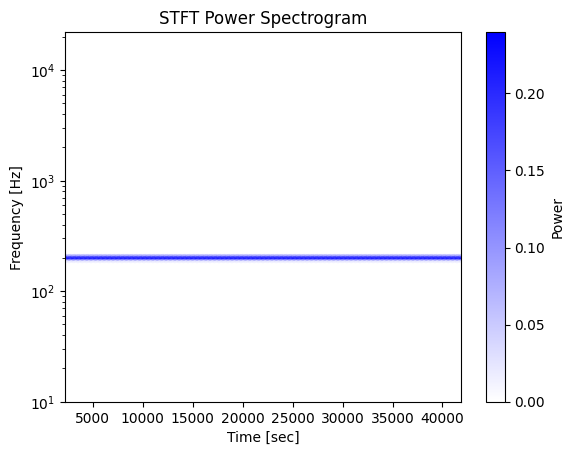

In [5]:
mask = f > 0
colors = ["white", "blue"]  # White for negative, black for positive
cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", colors)
plt.pcolormesh(t, f[mask]*sample_rate, np.abs(Zxx[mask, :])**2, shading='gouraud', cmap=cmap)
plt.yscale('log')
plt.title('STFT Power Spectrogram')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar(label='Power')
plt.show()

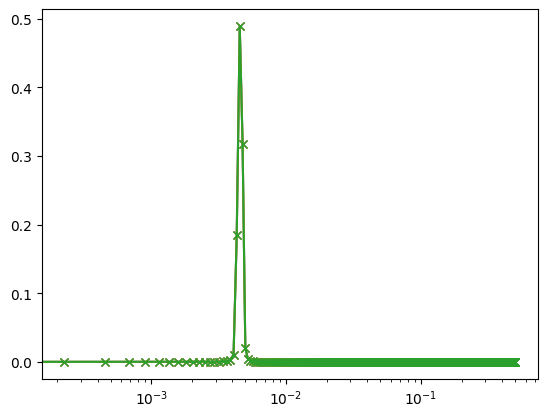

In [6]:
plt.plot(f, np.abs(Zxx[:,10]),'x-')
plt.plot(f, np.abs(Zxx[:,15]),'x-')
plt.plot(f, np.abs(Zxx[:,0]),'x-')
plt.xscale('log')

In [7]:
t, x_rec = istft(Zxx, fs=fs, nperseg=nperseg)

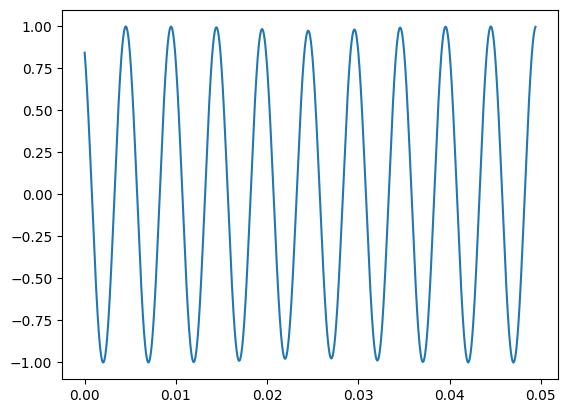

In [8]:
nmax = 10*int(sample_rate/O)
plt.plot(t[:nmax]/sample_rate, x_rec[:nmax])

In [10]:
window = get_window('hann', nperseg)

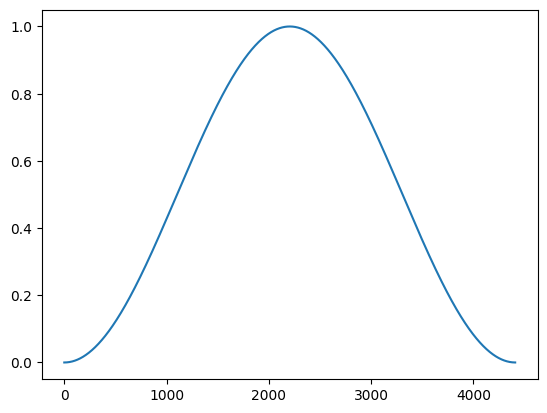

In [11]:
plt.plot(window)

In [12]:
np.real(1+3j)

1.0